### Import libraries

In [1]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load data set

In [2]:
df = pd.read_csv("Titanic 1.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Exploration

##### 1) Reanme the column

In [3]:
df.rename(columns = {'Sex': 'Gender'}, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### 2) Check missing values

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### 3) Visualize the Survival rate

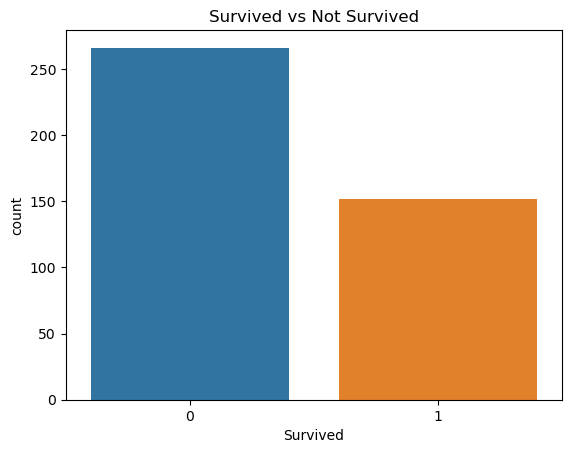

In [5]:
sns.countplot(x = 'Survived', data = df)
plt.title('Survived vs Not Survived')
plt.show()

##### 4) Gender wise survival rate

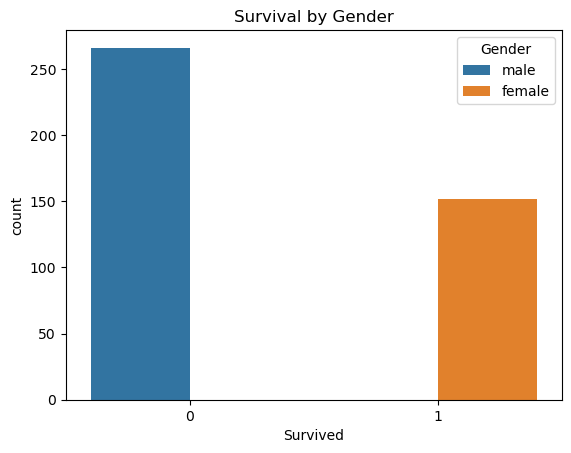

In [6]:
sns.countplot(x = 'Survived', hue = 'Gender', data = df )
plt.title("Survival by Gender")
plt.show()

##### 5) Age wise survival rate

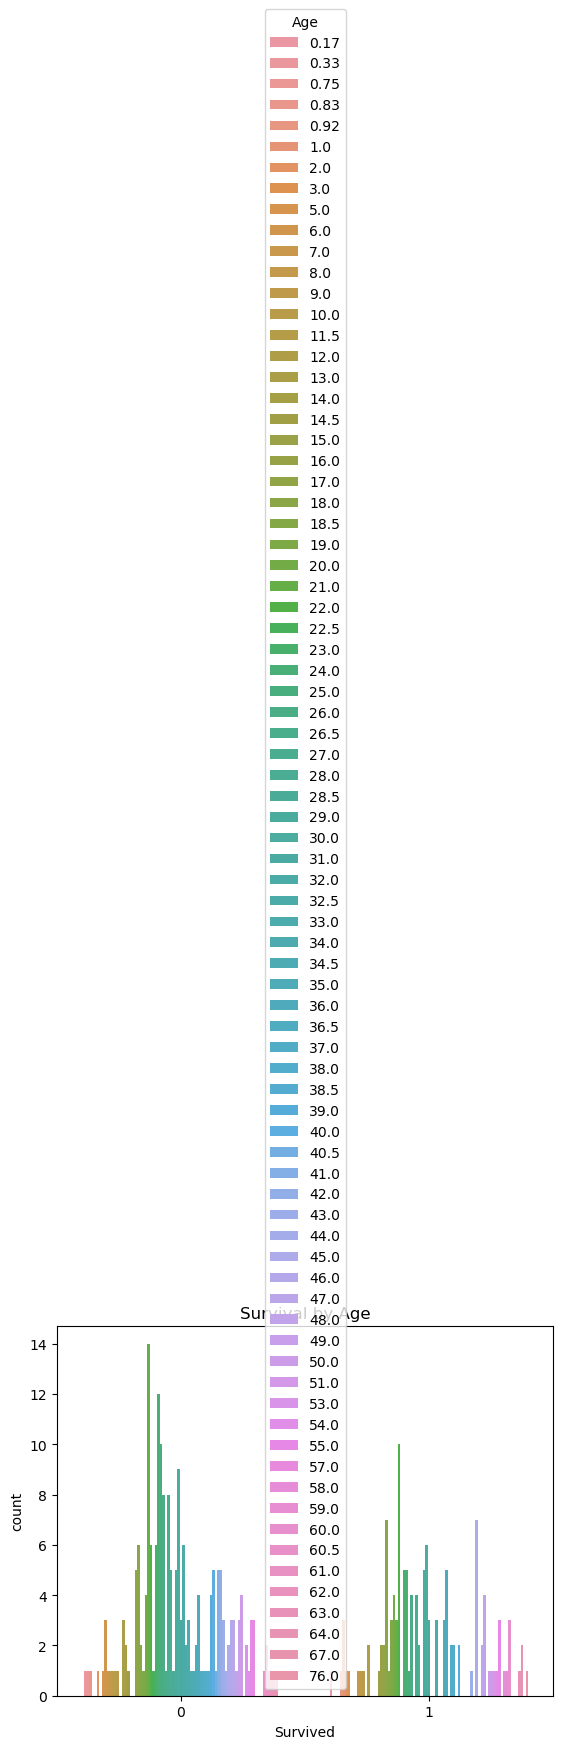

In [7]:
sns.countplot(x = 'Survived', hue = 'Age', data = df)
plt.title("Survival by Age")
plt.show()

##### 6) Pclass wise survival rate

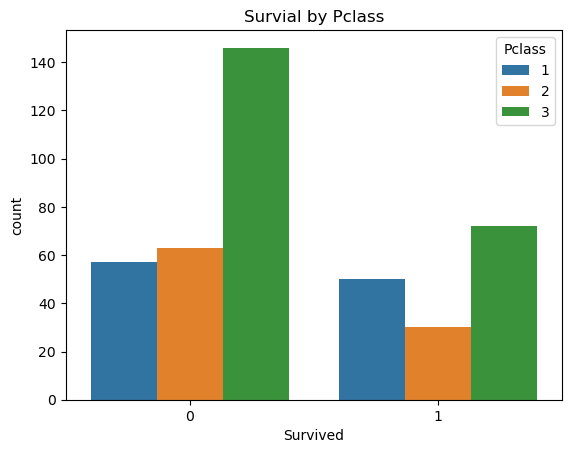

In [8]:
sns.countplot(x = "Survived", hue = "Pclass", data = df)
plt.title("Survial by Pclass")
plt.show()

### Data Preprocessing

##### 1) Fill Missing Values in Age

In [9]:
df['Age'].fillna(df['Age'].median(), inplace = True)

##### 2) Fill Missing values in Fair

In [10]:
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

##### 3) Drop Cabin coulmn

In [11]:
df.drop(columns = ['Cabin'], inplace = True)

In [12]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Encode Categorical Variables

In [14]:
df = pd.get_dummies(df, columns = ['Gender', 'Embarked'], drop_first = True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender_male,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


### Featuers and Target Variables

In [15]:
x = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y= df['Survived']
print(x.head())

   Pclass   Age  SibSp  Parch     Fare  Gender_male  Embarked_Q  Embarked_S
0       3  34.5      0      0   7.8292            1           1           0
1       3  47.0      1      0   7.0000            0           0           1
2       2  62.0      0      0   9.6875            1           1           0
3       3  27.0      0      0   8.6625            1           0           1
4       3  22.0      1      1  12.2875            0           0           1


### Split The Data Into Training And Testing Set

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

##### 1) Output of x_train

In [17]:
print("x_train: ")
print(x_train.head())

x_train: 
     Pclass   Age  SibSp  Parch     Fare  Gender_male  Embarked_Q  Embarked_S
336       2  32.0      0      0  13.0000            1           0           1
31        2  24.0      2      0  31.5000            1           0           1
84        2  27.0      0      0  10.7083            1           1           0
287       1  24.0      1      0  82.2667            1           0           1
317       2  19.0      0      0  10.5000            1           0           1


##### 2) Output of x_test

In [18]:
print("x_test: ")
print(x_test.head())

x_test: 
     Pclass   Age  SibSp  Parch      Fare  Gender_male  Embarked_Q  Embarked_S
321       3  25.0      0      0    7.2292            1           0           0
324       1  39.0      0      0  211.3375            0           0           1
388       3  21.0      0      0    7.7500            1           1           0
56        3  35.0      0      0    7.8958            1           0           1
153       3  36.0      0      2   12.1833            0           0           1


##### 3) Output of y_train

In [19]:
print("y_train: ")
print(y_train.head())

y_train: 
336    0
31     0
84     0
287    0
317    0
Name: Survived, dtype: int64


##### 4) Output of y_test

In [20]:
print("y_test: ")
print(y_test.head())

y_test: 
321    0
324    1
388    0
56     0
153    1
Name: Survived, dtype: int64


### Train a machine learning model

In [21]:
model = LogisticRegression(max_iter = 200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

### Make prediction

In [22]:
y_pred = model.predict(x_test)

In [23]:
print("Predictions:")
print(y_pred)

Predictions:
[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


### Evaluate the model

##### 1) Calculate Accuracy

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


##### 2) Confusion Matrix

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[50  0]
 [ 0 34]]


##### 3) Classification Report

In [26]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### Visualize the Confusion Matrix

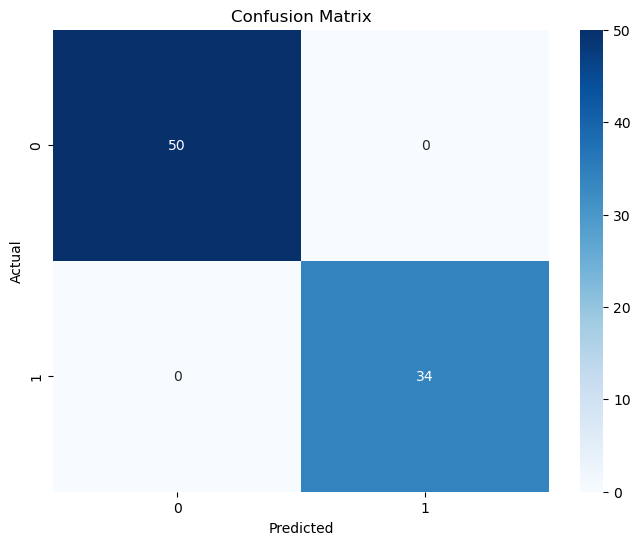

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()